In [ ]:
!unzip ./drive/MyDrive/2023_k_ium_composition/train_set.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: train_set/1522LI-B.jpg  
 extracting: train_set/1522LV-A.jpg  
 extracting: train_set/1522LV-B.jpg  
 extracting: train_set/1522RI-A.jpg  
 extracting: train_set/1522RI-B.jpg  
 extracting: train_set/1522RV-A.jpg  
 extracting: train_set/1522RV-B.jpg  
 extracting: train_set/1523LI-A.jpg  
 extracting: train_set/1523LI-B.jpg  
 extracting: train_set/1523LV-A.jpg  
 extracting: train_set/1523LV-B.jpg  
 extracting: train_set/1523RI-A.jpg  
 extracting: train_set/1523RI-B.jpg  
 extracting: train_set/1523RV-A.jpg  
 extracting: train_set/1523RV-B.jpg  
 extracting: train_set/1524LI-A.jpg  
 extracting: train_set/1524LI-B.jpg  
 extracting: train_set/1524LV-A.jpg  
 extracting: train_set/1524LV-B.jpg  
 extracting: train_set/1524RI-A.jpg  
 extracting: train_set/1524RI-B.jpg  
 extracting: train_set/1524RV-A.jpg  
 extracting: train_set/1524RV-B.jpg  
 extracting: train_set/1525LI-A.jpg  
 extracting: train_set/1525LI-B.jpg  
 extracting: t

In [ ]:
from collections import defaultdict
import os
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
train_df = pd.read_csv("./train_set/train.csv")

In [ ]:
train_df.head()

,Index,Aneurysm,L_ICA,R_ICA,L_PCOM,R_PCOM,L_AntChor,R_AntChor,L_ACA,R_ACA,...,R_MCA,L_VA,R_VA,L_PICA,R_PICA,L_SCA,R_SCA,BA,L_PCA,R_PCA
0,1001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1002,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1004,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1005,1,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


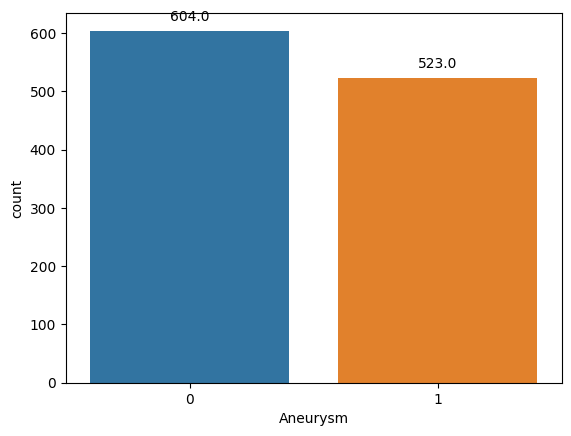

In [ ]:
ax = sns.countplot(x="Aneurysm", data=train_df)
for p in ax.patches:
  ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width()/2, p.get_height()), ha="center", va="center", xytext=(0, 10), textcoords="offset points")
plt.show()

뇌동맥류 갯수

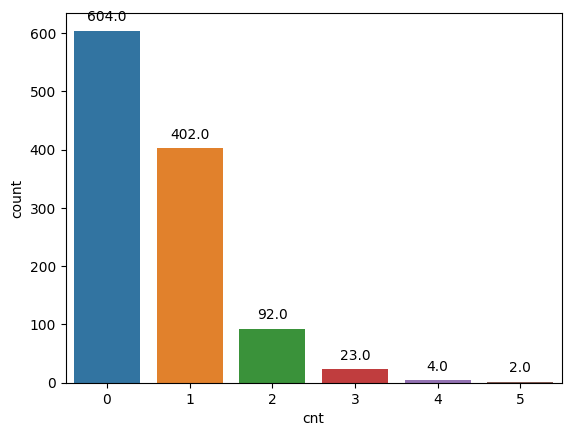

In [ ]:
pos_df = train_df.drop(columns=["Index", "Aneurysm"])
lst = []
for idx, row in pos_df.iterrows():
  lst.append(row.sum())
pos_df["cnt"] = lst


ax = sns.countplot(x="cnt", data=pos_df)
for p in ax.patches:
  ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width()/2, p.get_height()), ha="center", va="center", xytext=(0, 10), textcoords="offset points")
plt.show()

In [ ]:
pos_df.columns[:-1]

Index(['L_ICA', 'R_ICA', 'L_PCOM', 'R_PCOM', 'L_AntChor', 'R_AntChor', 'L_ACA',
       'R_ACA', 'L_ACOM', 'R_ACOM', 'L_MCA', 'R_MCA', 'L_VA', 'R_VA', 'L_PICA',
       'R_PICA', 'L_SCA', 'R_SCA', 'BA', 'L_PCA', 'R_PCA'],
      dtype='object')

In [ ]:
cnt_dict = defaultdict(lambda: [0])

for idx, row in pos_df.iterrows():
  for k, v in row.items():
    if k == "cnt":
      continue
    cnt_dict[k][0] += v

cnt_df = pd.DataFrame.from_dict(data=cnt_dict)
cnt_df.head()

,L_ICA,R_ICA,L_PCOM,R_PCOM,L_AntChor,R_AntChor,L_ACA,R_ACA,L_ACOM,R_ACOM,...,R_MCA,L_VA,R_VA,L_PICA,R_PICA,L_SCA,R_SCA,BA,L_PCA,R_PCA
0,100,100,35,34,30,18,21,13,66,30,...,96,17,11,3,2,6,4,24,3,1


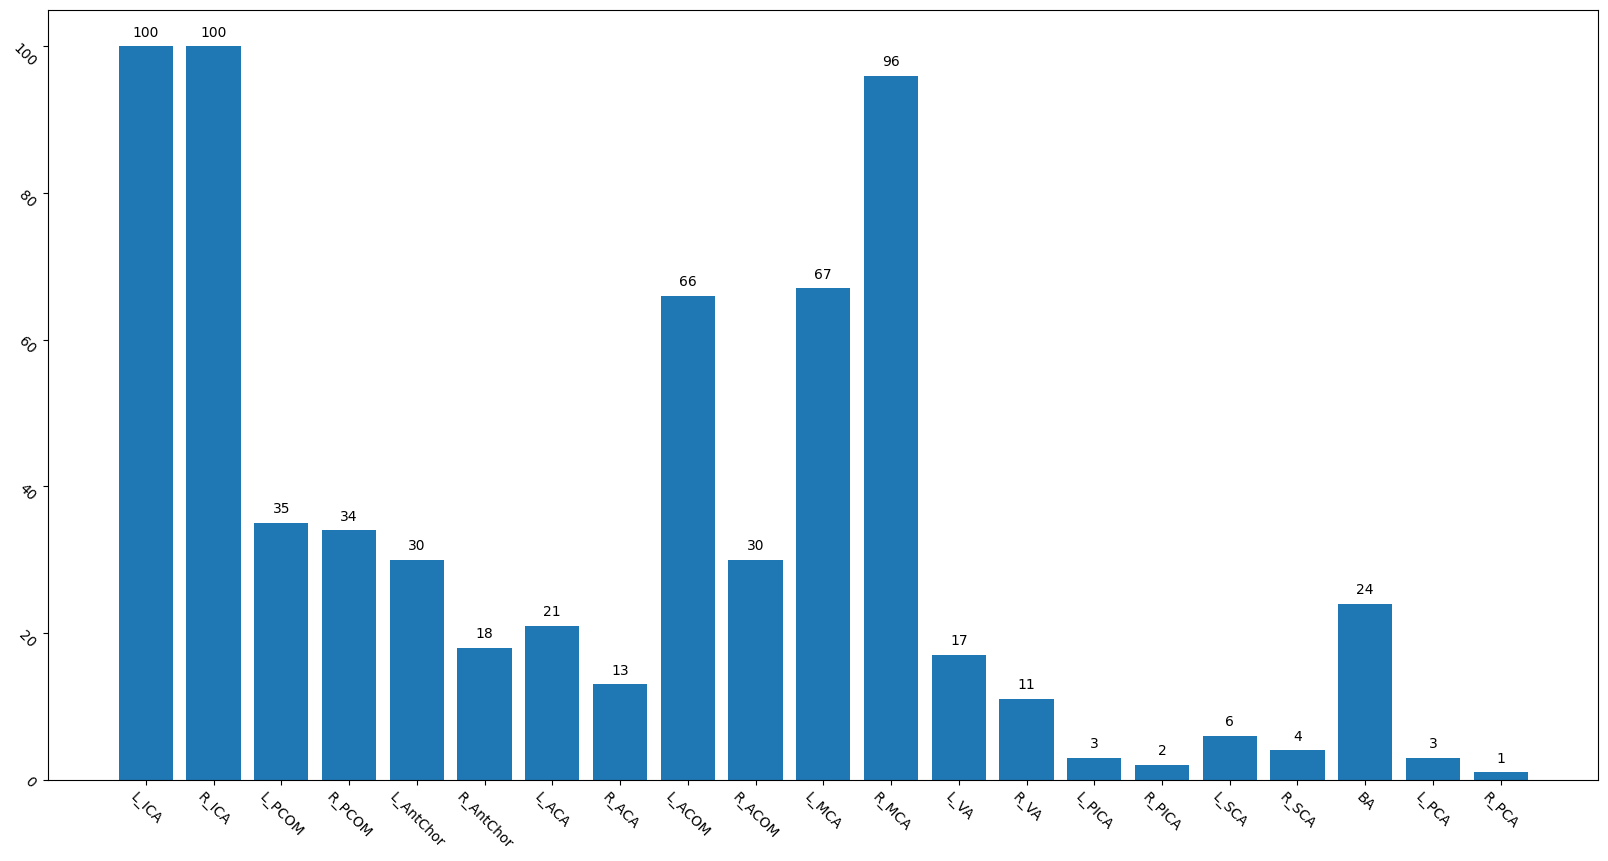

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(cnt_df.columns, cnt_df.values[0])
ax.tick_params(labelrotation=-45)
for p in ax.patches:
  ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width()/2, p.get_height()), ha="center", va="center", xytext=(0, 10), textcoords="offset points")
plt.show()

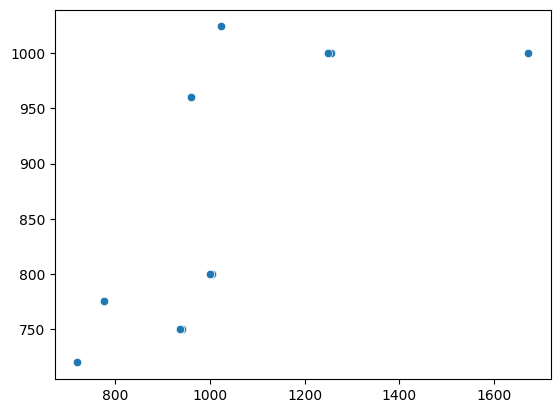

In [ ]:
img_lst = glob("./train_set/*.jpg")
w_lst = []
h_lst = []
for img_path in img_lst:
  img = cv2.imread(img_path)
  h, w, _ = img.shape
  w_lst.append(w)
  h_lst.append(h)

sns.scatterplot(x=w_lst, y=h_lst)
plt.show()